In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from data import Data
from data_plotting import DataPlotting

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5



# Loading and processing data

In [2]:
file_path_E8508BDFF2AE = './data/v2_dataset/E8508BDFF2AE/CLT (20200716_174206).txt'
file_path_F4428F5EB41D = './data/v2_dataset/F4428F5EB41D/CLT (20200716_174205).txt'
data = Data(file_path_E8508BDFF2AE, file_path_F4428F5EB41D)
data_1, data_2 = data.load_data(2, 'timestamp')

Data 1 : 
./data/v2_dataset/E8508BDFF2AE/CLT (20200716_174206).txt loaded.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 792477 entries, 2020-07-16 08:42:07.312000 to 2020-07-16 09:06:12.722000
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   mag_x        792477 non-null  float64
 1   mag_y        792477 non-null  float64
 2   mag_z        792477 non-null  float64
 3   mag_acc      792477 non-null  int64  
 4   acc_x        792477 non-null  float64
 5   acc_y        792477 non-null  float64
 6   acc_z        792477 non-null  float64
 7   acc_acc      792477 non-null  int64  
 8   gyro_x       792477 non-null  float64
 9   gyro_y       792477 non-null  float64
 10  gyro_z       792477 non-null  float64
 11  gyro_acc     792477 non-null  int64  
 12  pos_lat      792477 non-null  float64
 13  pos_lng      792477 non-null  float64
 14  pos_acc      792477 non-null  float64
 15  activity     792477 non-null  

In [3]:
data_1, data_2 = data.total_intensity()

In [4]:
data_1, data_2 = data.downsampling('250ms')

In [5]:
data_1, data_2 = data.normalise(1)

In [6]:
data_1.head()

,mag_x,mag_y,mag_z,mag_acc,mag_ti,acc_x,acc_y,acc_z,acc_acc,gyro_x,gyro_y,gyro_z,gyro_acc,pos_lat,pos_lng,pos_acc,mag_ti_norm
timestamp,,,,,,,,,,,,,,,,,
2020-07-16 08:42:07.250,-26.852778,31.494445,-29.322222,3.0,50.834755,-1.118641,-3.751132,10.416756,3.0,-0.603842,-0.576057,-0.185889,3.0,35.150231,129.004071,22.279,0.040452
2020-07-16 08:42:07.500,-26.535196,30.893855,-29.544134,3.0,50.470112,-0.219023,-1.886745,9.701967,3.0,1.227637,-0.127939,0.499175,3.0,35.150231,129.004070,22.279,0.040105
2020-07-16 08:42:07.750,-26.716667,24.707639,-35.475000,3.0,50.852372,0.057311,1.379226,9.226048,3.0,0.221575,-0.181960,0.109071,3.0,35.150231,129.004070,22.279,0.040468
2020-07-16 08:42:08.000,-28.806383,23.295745,-34.617731,3.0,50.717888,0.690549,1.134818,9.991301,3.0,0.611258,-0.312470,0.069023,3.0,35.150231,129.004070,22.279,0.040340
2020-07-16 08:42:08.250,-30.427858,20.094286,-35.157143,3.0,50.742243,2.083665,2.844953,8.689644,3.0,0.325324,-0.507127,-0.055470,3.0,35.150231,129.004070,22.279,0.040364


In [7]:
data_2.head()

,mag_x,mag_y,mag_z,mag_acc,mag_ti,acc_x,acc_y,acc_z,acc_acc,gyro_x,gyro_y,gyro_z,gyro_acc,pos_lat,pos_lng,pos_acc,mag_ti_norm
timestamp,,,,,,,,,,,,,,,,,
2020-07-16 08:42:05.750,-24.905435,38.434783,-43.786957,3.0,63.387402,2.525375,0.196650,9.596832,3.0,0.424172,-0.656573,-0.024142,3.0,35.150136,128.99892,1700.0,0.086910
2020-07-16 08:42:06.000,-16.702143,33.557144,-47.869286,3.0,61.246915,1.266097,1.576992,9.034093,3.0,0.715074,1.366255,-0.290208,3.0,35.150136,128.99892,1700.0,0.083673
2020-07-16 08:42:06.250,-3.913971,27.594853,-49.277206,3.0,56.676356,-1.446846,1.859828,6.703879,3.0,-1.149600,-0.190878,0.145362,3.0,35.150136,128.99892,1700.0,0.076762
2020-07-16 08:42:06.500,2.356250,54.971876,-54.037501,3.0,77.820761,-0.157559,-3.091373,11.873772,3.0,-0.849607,0.286165,1.074935,3.0,35.150136,128.99892,1700.0,0.108735
2020-07-16 08:42:06.750,10.020134,50.638256,-53.584565,3.0,74.975216,-0.618869,-0.729468,9.612053,3.0,0.796668,-0.641497,-0.617553,3.0,35.150136,128.99892,1700.0,0.104432


### Visualizing total intensity

In [8]:
data_plotting = DataPlotting()

Data 1 : 
Start :
 2020-07-16 08:42:08
End :
 2020-07-16 09:06:11.750000
Time delta :
 0 days 00:24:03.750000
Shape :
 (5776, 1) 

Data 2 : 
Start :
 2020-07-16 08:42:08
End :
 2020-07-16 09:06:11.750000
Time delta :
 0 days 00:24:03.750000
Shape :
 (5776, 1) 



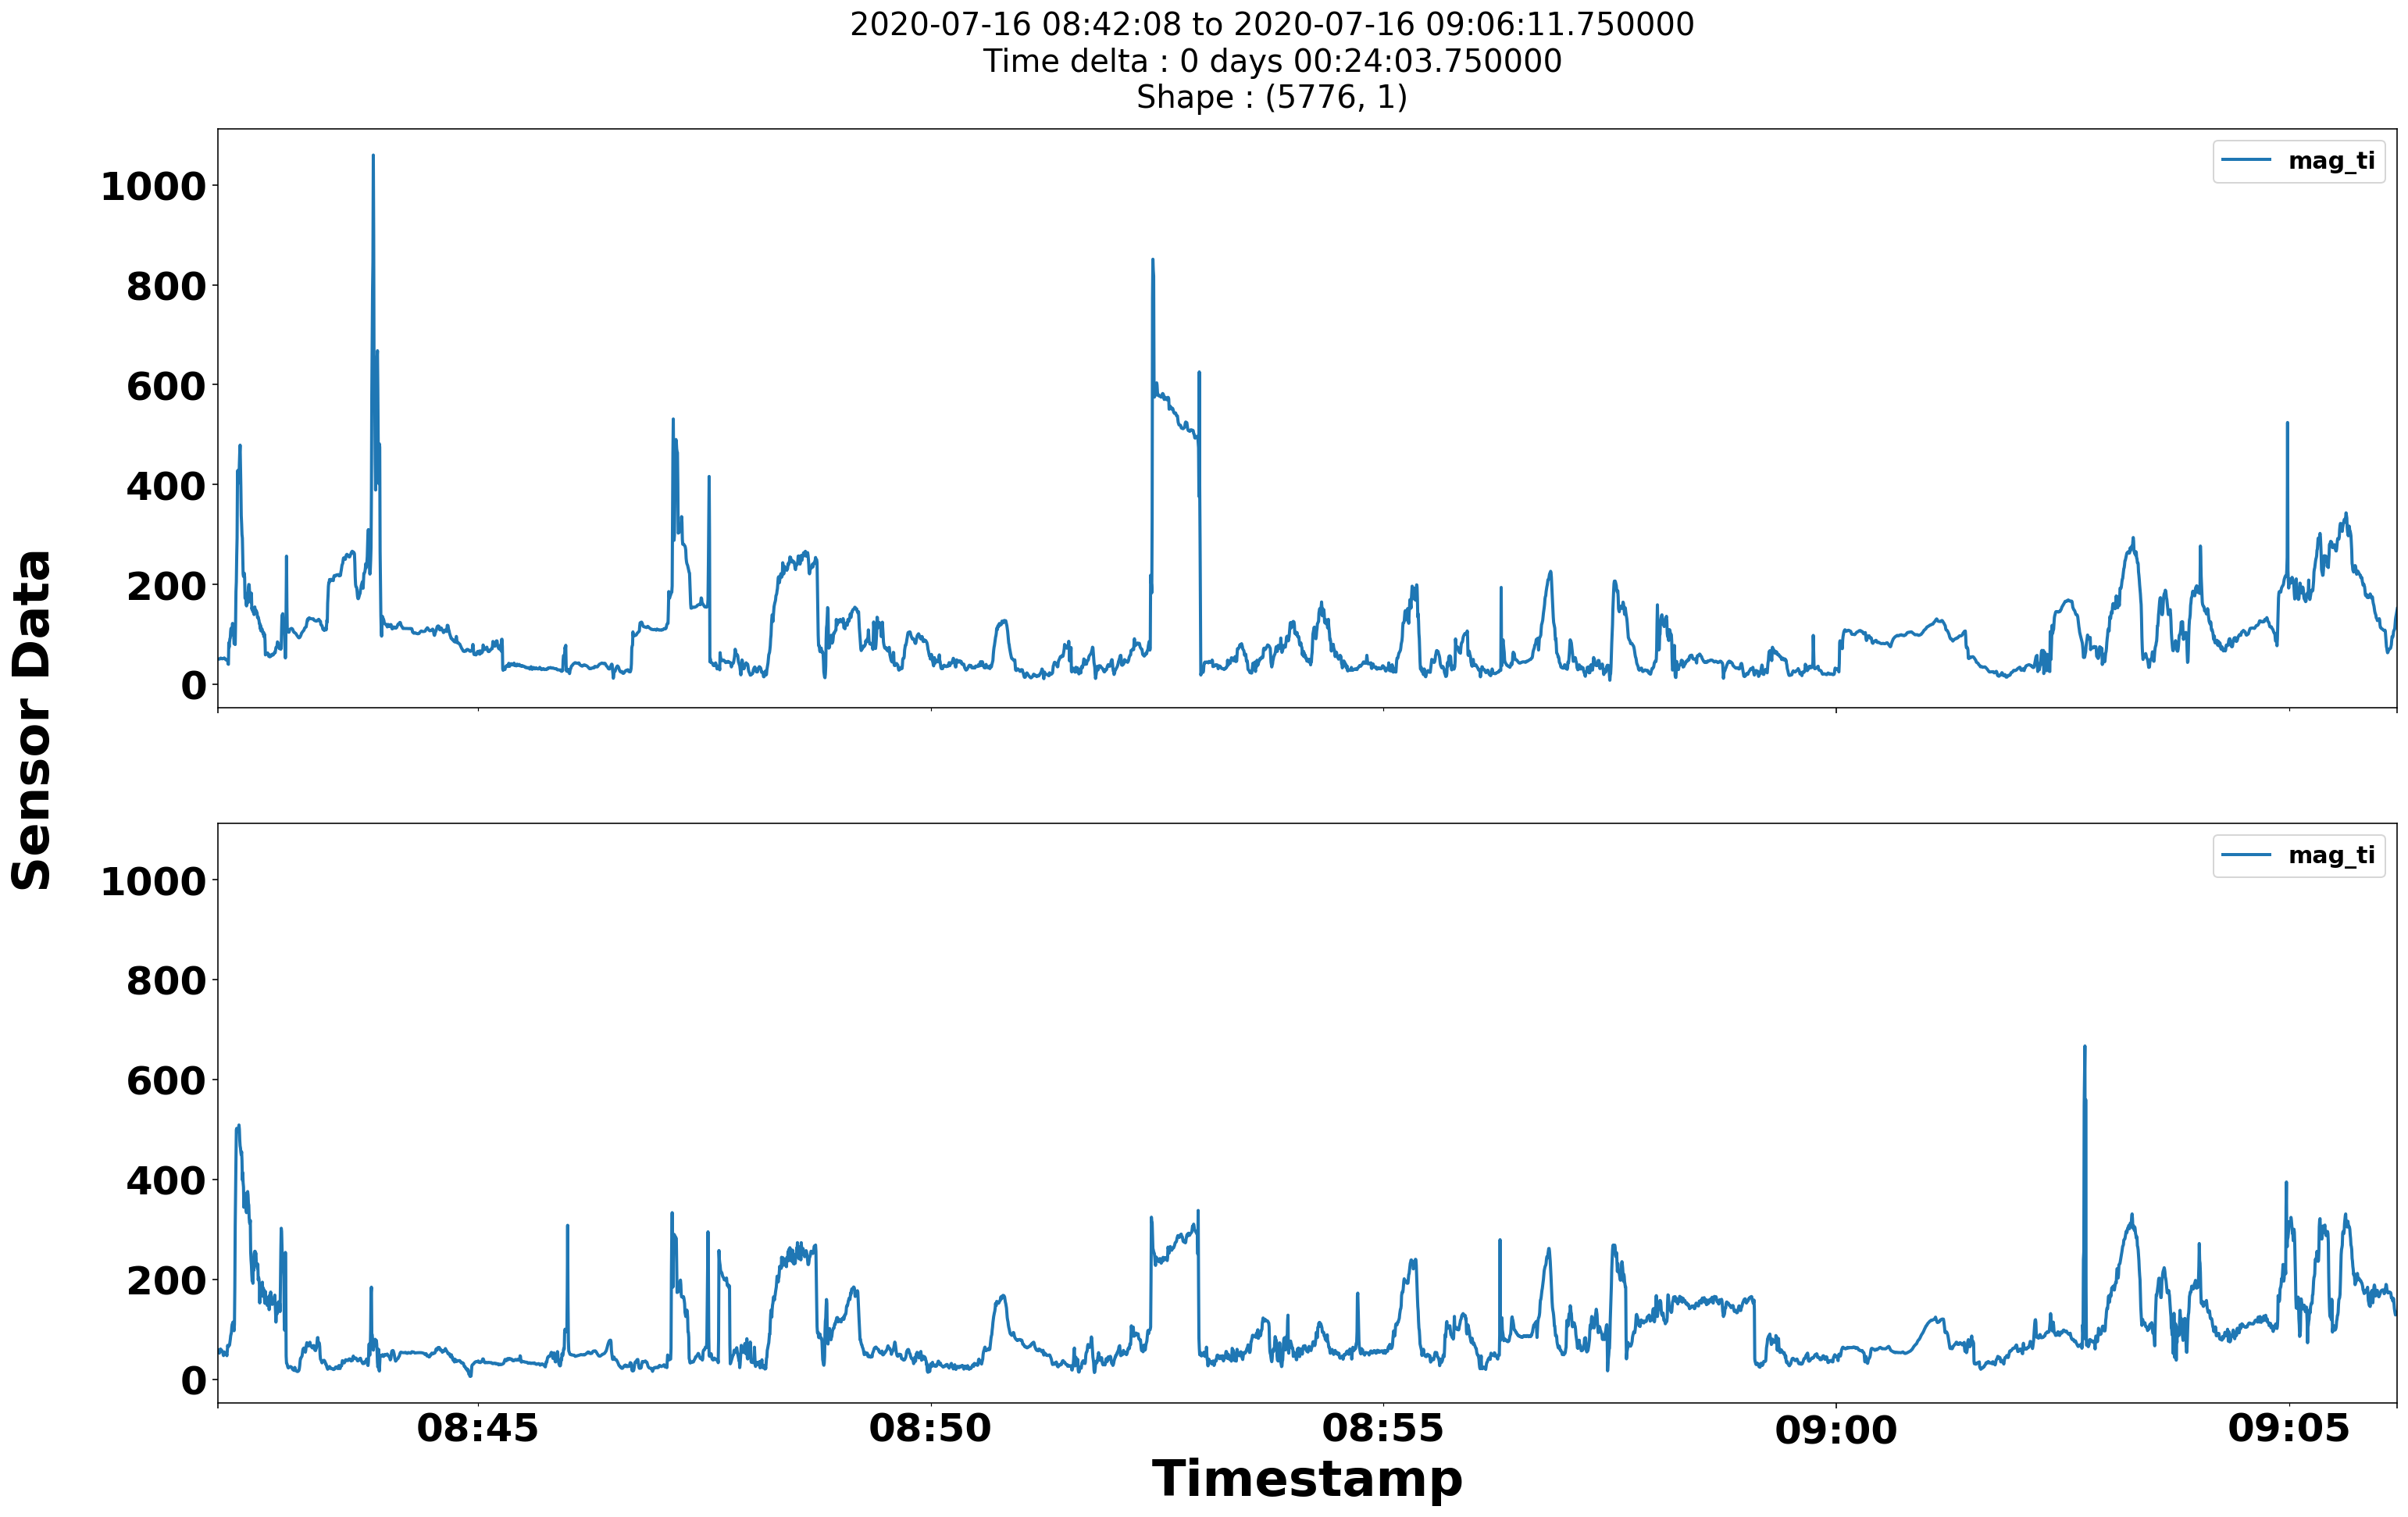

In [9]:
data_plotting.plot_data_comp(data_1["2020-07-16 08:42:08":"2020-07-16 09:06:11"][['mag_ti']], 
                             data_2["2020-07-16 08:42:08":"2020-07-16 09:06:11"][['mag_ti']],
                             'Timestamp', 'Sensor Data', 15, 'E8508BDFF2AE-F4428F5EB41D', 
                             '(pp)20200716_174206-20200716_174205_st_1ti(ds)', False)

Data 1 : 
Start :
 2020-07-16 08:42:08
End :
 2020-07-16 09:06:11.750000
Time delta :
 0 days 00:24:03.750000
Shape :
 (5776, 1) 

Data 2 : 
Start :
 2020-07-16 08:42:08
End :
 2020-07-16 09:06:11.750000
Time delta :
 0 days 00:24:03.750000
Shape :
 (5776, 1) 



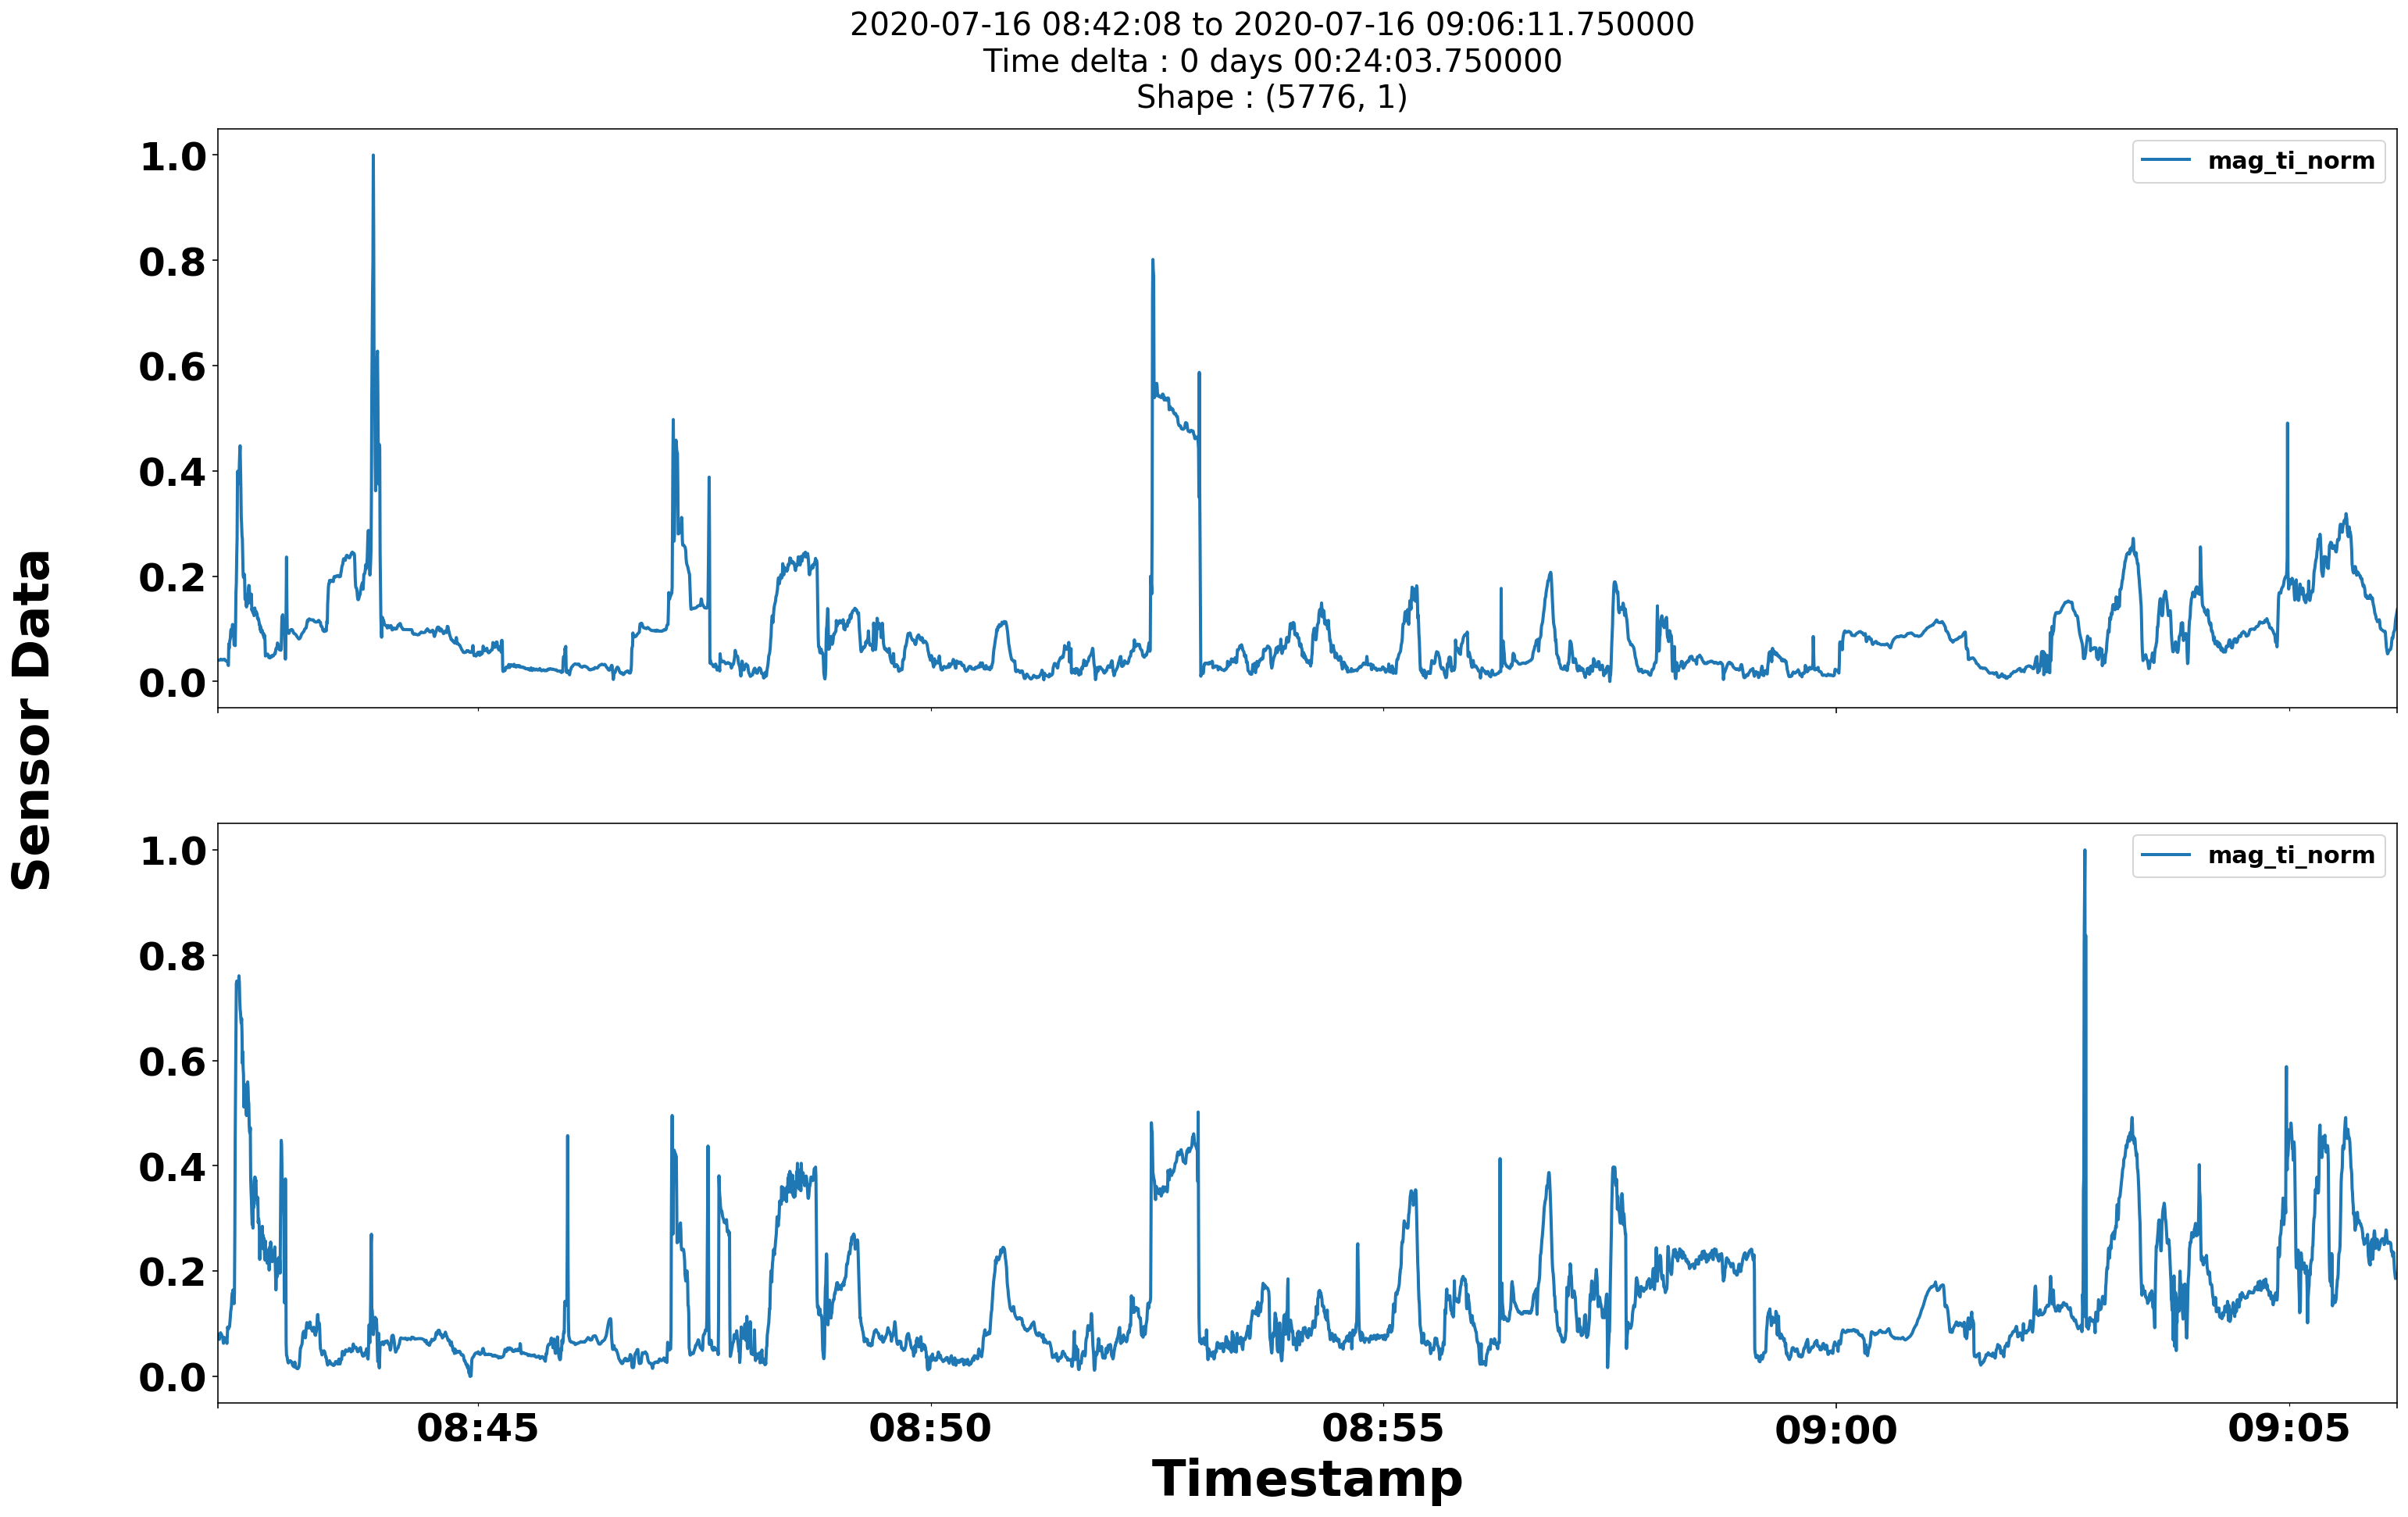

In [10]:
data_plotting.plot_data_comp(data_1["2020-07-16 08:42:08":"2020-07-16 09:06:11"][['mag_ti_norm']], 
                             data_2["2020-07-16 08:42:08":"2020-07-16 09:06:11"][['mag_ti_norm']], 
                             'Timestamp', 'Sensor Data', 15, 'E8508BDFF2AE-F4428F5EB41D', 
                             '(pp)20200716_174206-20200716_174205_st_1tin(ds)', False)

Data 1 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:55:00.750000
Time delta :
 0 days 00:05:00.750000
Shape :
 (1204, 1) 

Data 2 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:55:00.750000
Time delta :
 0 days 00:05:00.750000
Shape :
 (1204, 1) 



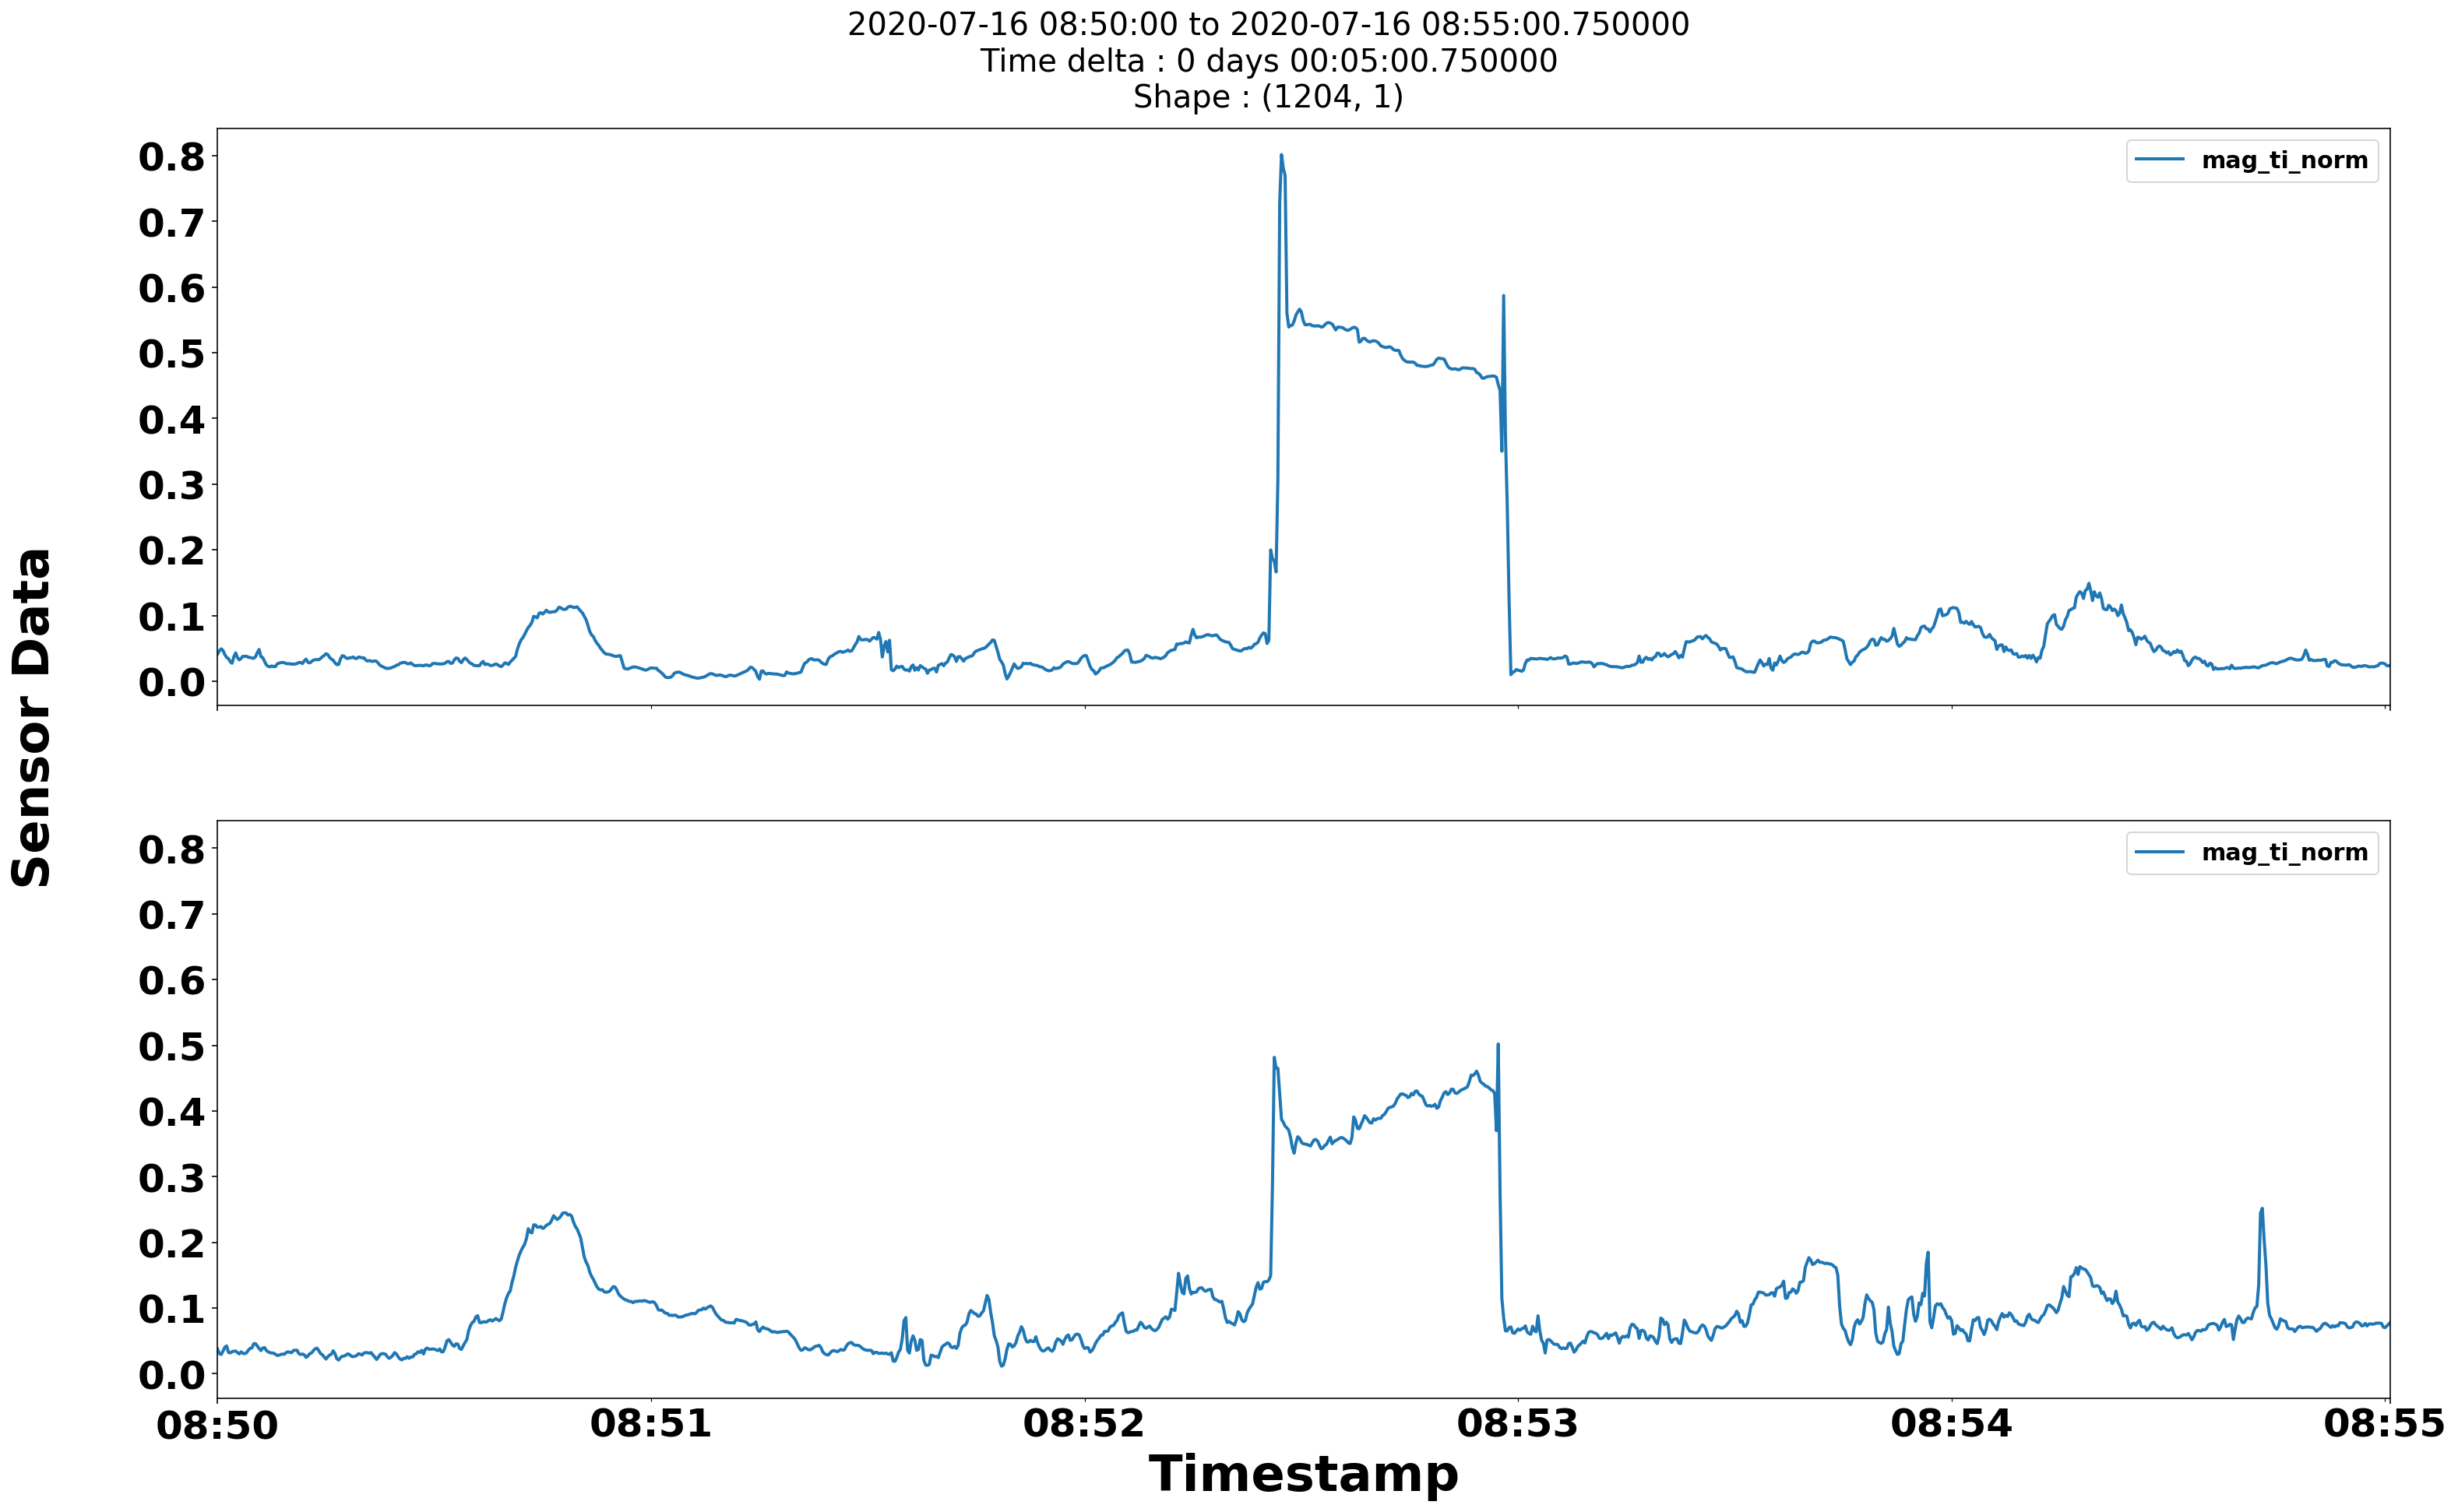

In [11]:
data_plotting.plot_data_comp(data_1["2020-07-16 08:50:00":"2020-07-16 08:55:00"][['mag_ti_norm']], 
                             data_2["2020-07-16 08:50:00":"2020-07-16 08:55:00"][['mag_ti_norm']], 
                             'Timestamp', 'Sensor Data', 15, 'E8508BDFF2AE-F4428F5EB41D', 
                             '(pp)20200716_174206-20200716_174205_st_2tin(ds)', False)

Data 1 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:52:00.750000
Time delta :
 0 days 00:02:00.750000
Shape :
 (484, 1) 

Data 2 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:52:00.750000
Time delta :
 0 days 00:02:00.750000
Shape :
 (484, 1) 



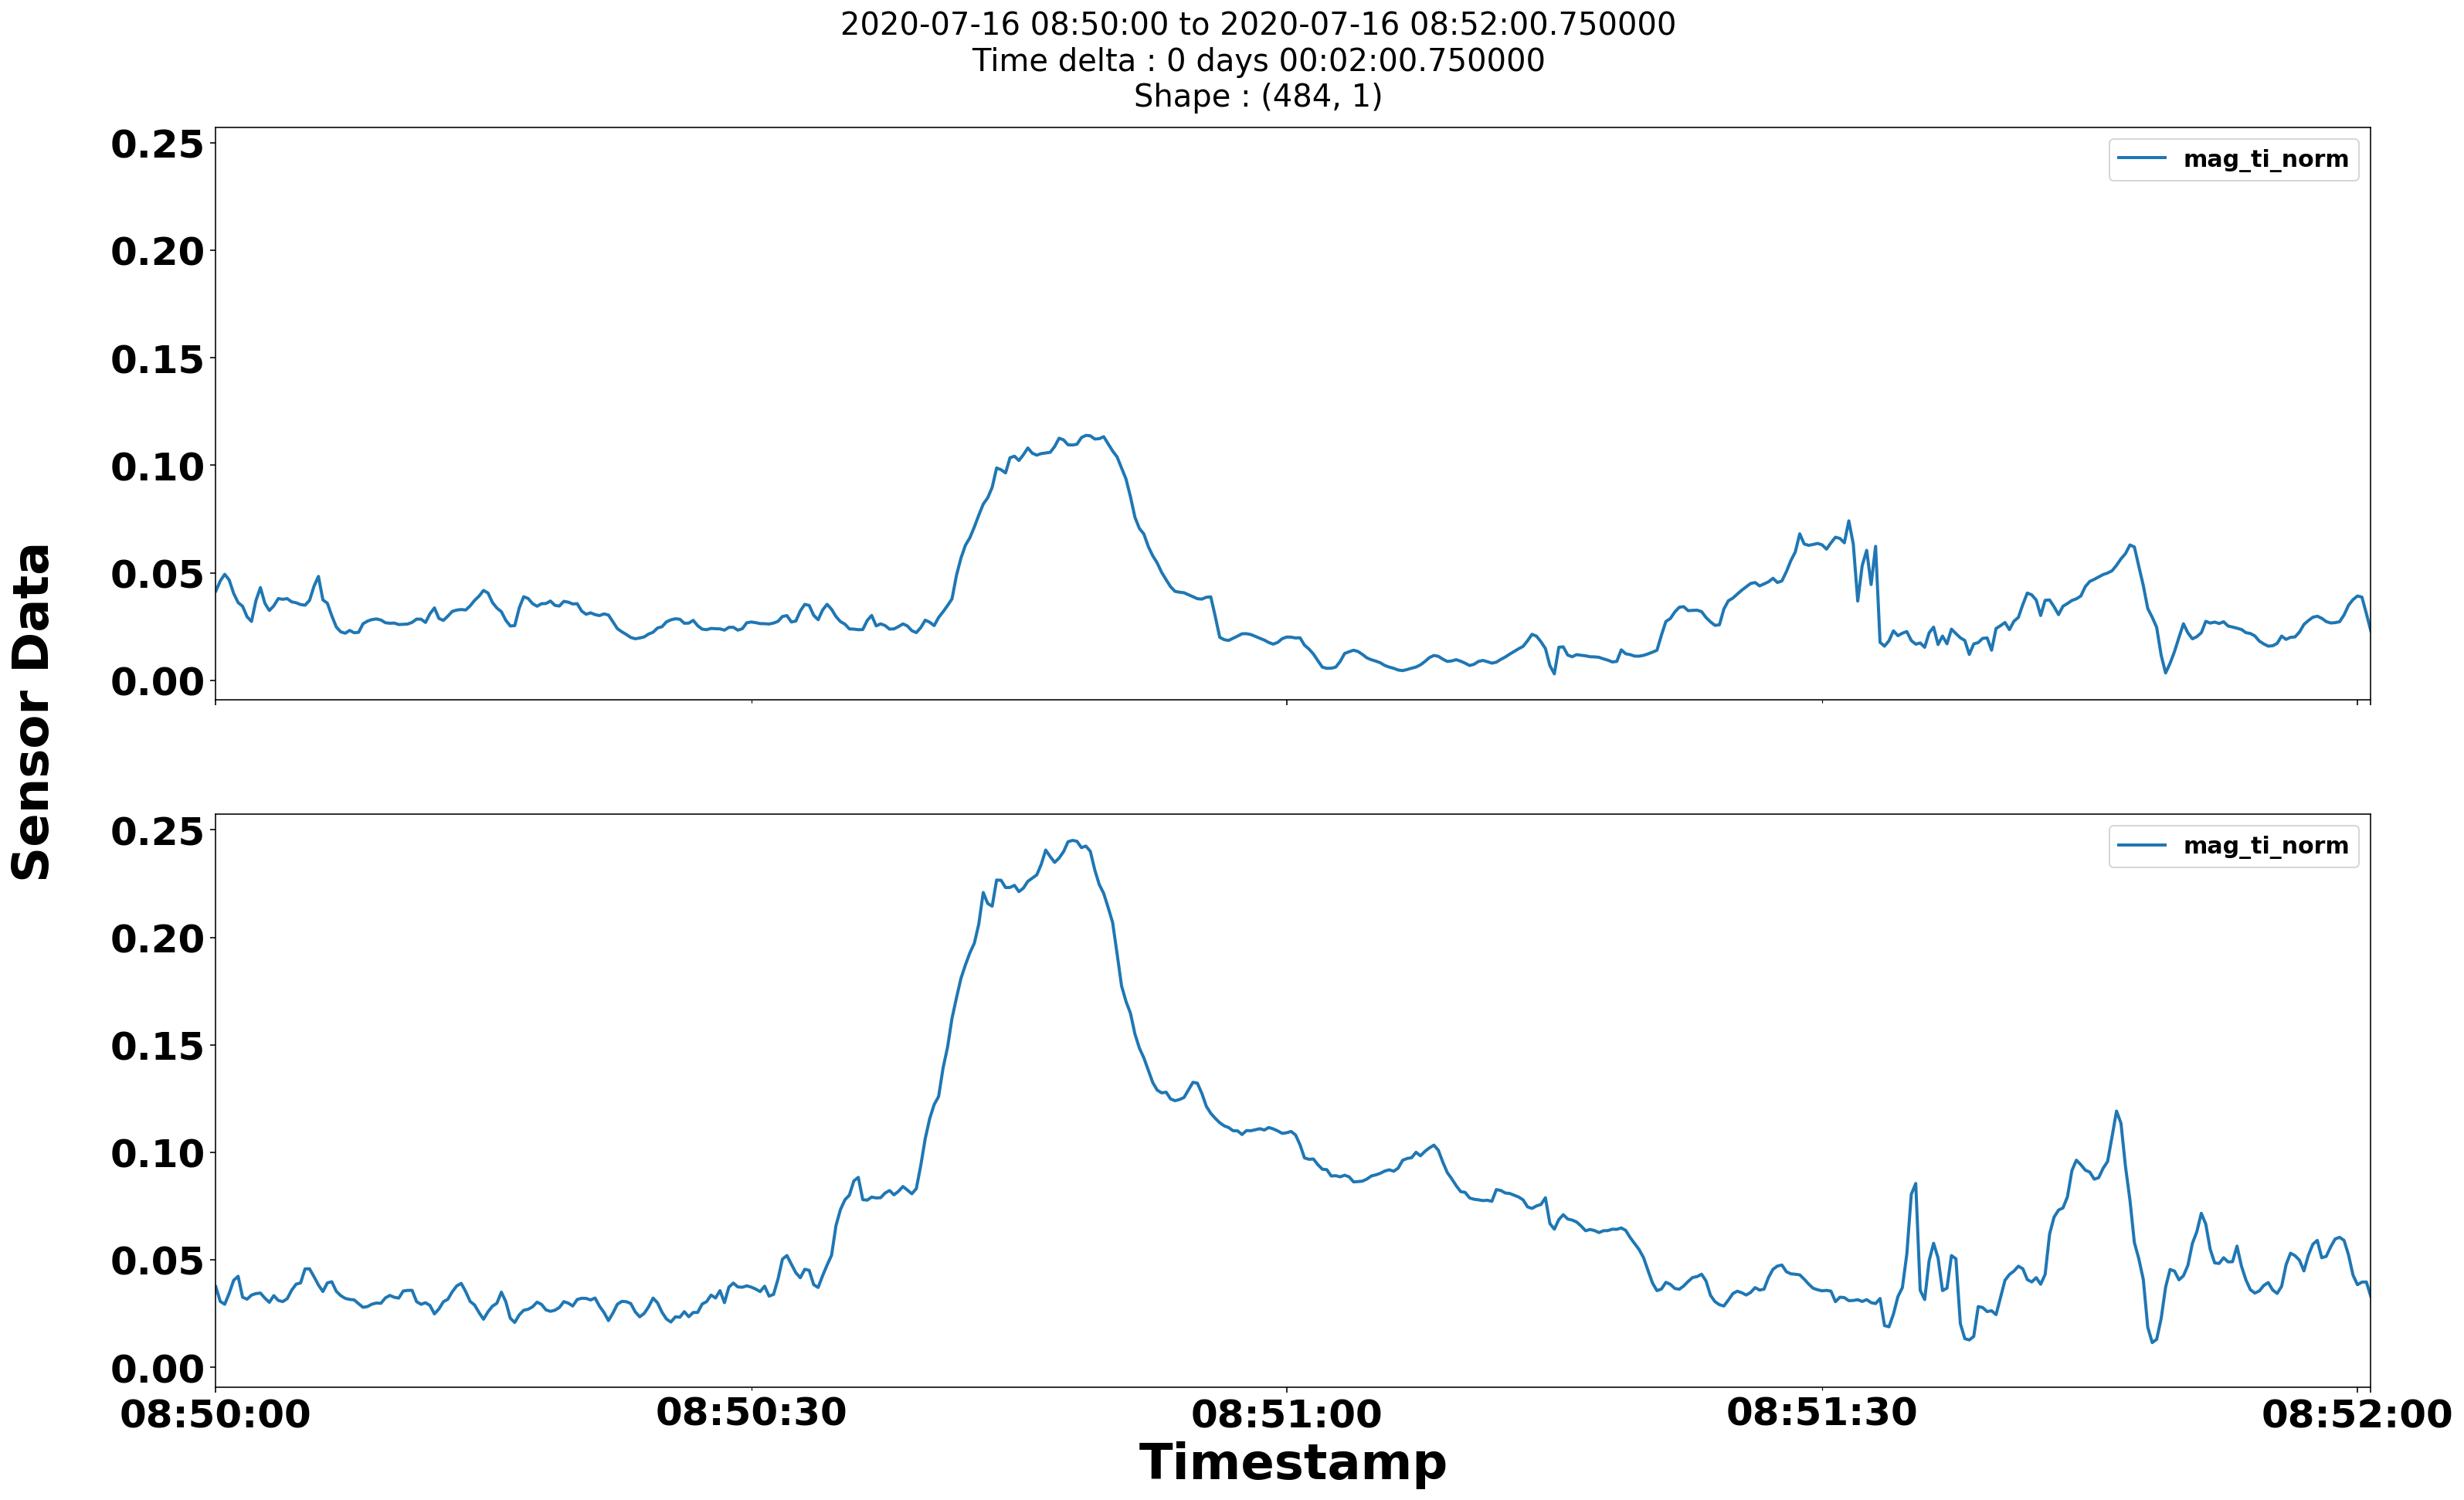

In [12]:
data_plotting.plot_data_comp(data_1["2020-07-16 08:50:00":"2020-07-16 08:52:00"][['mag_ti_norm']], 
                             data_2["2020-07-16 08:50:00":"2020-07-16 08:52:00"][['mag_ti_norm']],
                             'Timestamp', 'Sensor Data', 15, 'E8508BDFF2AE-F4428F5EB41D', 
                             '(pp)20200716_174206-20200716_174205_st_3tin(ds)', False)

### Generating training data

In [13]:
window = 480
data_train_raw = np.array(data_1["2020-07-16 08:50:00":"2020-07-16 08:55:00"]['mag_ti_norm'])

# GPU
data_train = data.window_sliding_GPU(data_train_raw, window, 10)

# CPU
# data_train = data.window_sliding_CPU(data_train_raw, window, 10)

Data shape :  (1204,)

Generating training data (GPU)...
Training data shape :  (7250, 480)


### Generating test data

In [14]:
data_test = data_2["2020-07-16 08:50:00":"2020-07-16 08:52:00"][['mag_ti_norm']].values
data_test = data_test[0:window]
data_test = data_test.reshape(1,len(data_test))

print(data_test.shape)
# print('\n', data_test)

(1, 480)


# Training and testing

In [15]:
from train import Train

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5



In [16]:
latent_dim = 10
epochs=100
batch_size=40

train = Train(data_train, window)
autoencoder, encoder, decoder, history = train.model1_ae('model1_ae/20200716_085000-20200716_085500', 'check_point',
                                                         latent_dim, epochs, batch_size)

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 480)]             0         
_________________________________________________________________
dense (Dense)                (None, 60)                28860     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                610       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                660       
_________________________________________________________________
dense_3 (Dense)              (None, 480)               29280     
Total params: 59,410
Trainable params: 59,410
Non-trainable params: 0
_________________________________________________________________
Train on 7250 samples
Epoch 1/100
7000/7250 [===========================>..] - ETA: 0s - loss: 0.0296
Epoch 00001: sa

7250/7250 [==============================] - 1s 80us/sample - loss: 0.0046
Epoch 28/100
7040/7250 [============================>.] - ETA: 0s - loss: 0.0045
Epoch 00028: saving model to ./models/model1_ae/20200716_085000-20200716_085500/check_point/1596599204/cp-0028.ckpt
7250/7250 [==============================] - 1s 83us/sample - loss: 0.0045
Epoch 29/100
6880/7250 [===========================>..] - ETA: 0s - loss: 0.0049
Epoch 00029: saving model to ./models/model1_ae/20200716_085000-20200716_085500/check_point/1596599204/cp-0029.ckpt
7250/7250 [==============================] - 1s 88us/sample - loss: 0.0050
Epoch 30/100
6760/7250 [==========================>...] - ETA: 0s - loss: 0.0045
Epoch 00030: saving model to ./models/model1_ae/20200716_085000-20200716_085500/check_point/1596599204/cp-0030.ckpt
7250/7250 [==============================] - 1s 95us/sample - loss: 0.0045
Epoch 31/100
6840/7250 [===========================>..] - ETA: 0s - loss: 0.0042
Epoch 00031: saving model to

Epoch 58/100
6880/7250 [===========================>..] - ETA: 0s - loss: 0.0039
Epoch 00058: saving model to ./models/model1_ae/20200716_085000-20200716_085500/check_point/1596599204/cp-0058.ckpt
7250/7250 [==============================] - 1s 83us/sample - loss: 0.0040
Epoch 59/100
6880/7250 [===========================>..] - ETA: 0s - loss: 0.0036
Epoch 00059: saving model to ./models/model1_ae/20200716_085000-20200716_085500/check_point/1596599204/cp-0059.ckpt
7250/7250 [==============================] - 1s 86us/sample - loss: 0.0036
Epoch 60/100
7040/7250 [============================>.] - ETA: 0s - loss: 0.0041
Epoch 00060: saving model to ./models/model1_ae/20200716_085000-20200716_085500/check_point/1596599204/cp-0060.ckpt
7250/7250 [==============================] - 1s 80us/sample - loss: 0.0041
Epoch 61/100
6760/7250 [==========================>...] - ETA: 0s - loss: 0.0035
Epoch 00061: saving model to ./models/model1_ae/20200716_085000-20200716_085500/check_point/1596599204/

7080/7250 [============================>.] - ETA: 0s - loss: 0.0031
Epoch 00088: saving model to ./models/model1_ae/20200716_085000-20200716_085500/check_point/1596599204/cp-0088.ckpt
7250/7250 [==============================] - 1s 82us/sample - loss: 0.0031
Epoch 89/100
6200/7250 [========================>.....] - ETA: 0s - loss: 0.0032
Epoch 00089: saving model to ./models/model1_ae/20200716_085000-20200716_085500/check_point/1596599204/cp-0089.ckpt
7250/7250 [==============================] - 1s 88us/sample - loss: 0.0032
Epoch 90/100
6400/7250 [=========================>....] - ETA: 0s - loss: 0.0030
Epoch 00090: saving model to ./models/model1_ae/20200716_085000-20200716_085500/check_point/1596599204/cp-0090.ckpt
7250/7250 [==============================] - 1s 84us/sample - loss: 0.0030
Epoch 91/100
6400/7250 [=========================>....] - ETA: 0s - loss: 0.0036
Epoch 00091: saving model to ./models/model1_ae/20200716_085000-20200716_085500/check_point/1596599204/cp-0091.ckpt


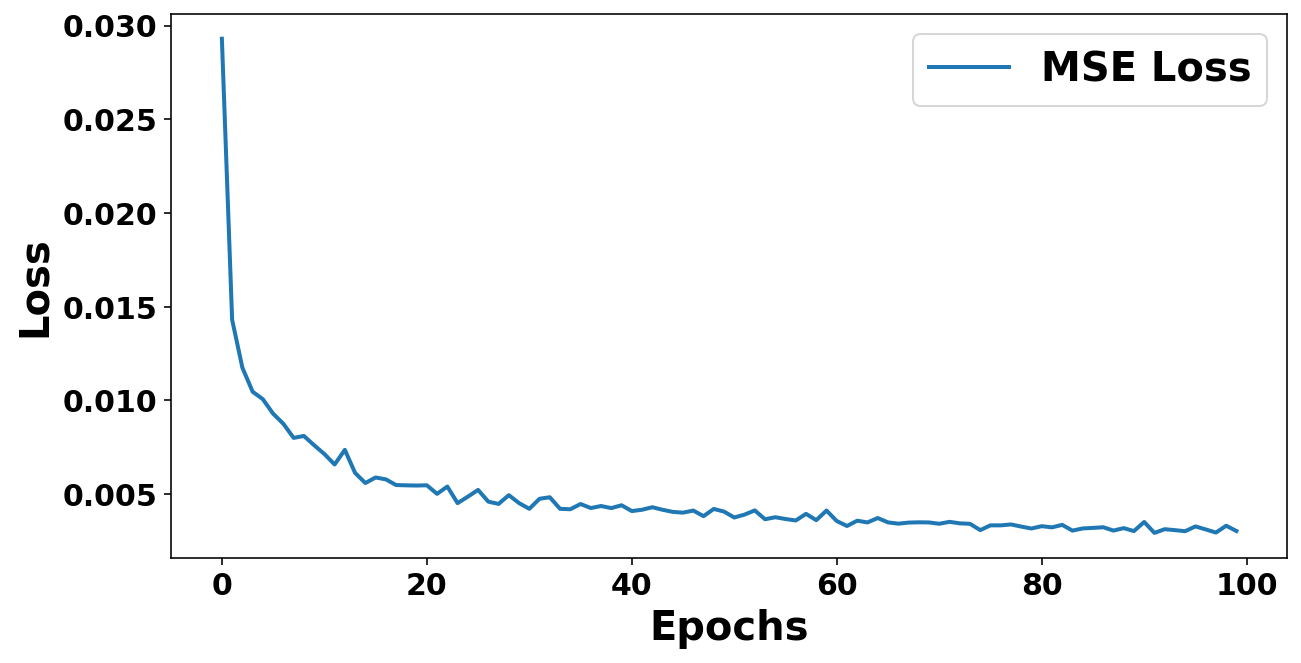

In [17]:
history_dict = history.history
loss_values = history_dict['loss']
hist_plot = pd.DataFrame({'MSE Loss': loss_values})

data_plotting.plot_hist(hist_plot, 'Epochs', 'Loss', 20)

In [18]:
latent_vector = encoder.predict(data_test)
reconstructed_data = decoder.predict(latent_vector)
mse = mean_squared_error(data_test, reconstructed_data)

print('MSE test data (data_2) : ', mse)

MSE test data (data_2) :  0.002845982189802434


In [19]:
description = '%s-60-%s-60-%s\nrelu \nadam \nmse \nbatch_size=%s\nepochs=%s' % (window, latent_dim, window, batch_size, epochs)
train.model_ae_save(autoencoder, encoder, decoder, history, 
                          'model1_ae/20200716_085000-20200716_085500', '0p0028', description)

### Plotting result

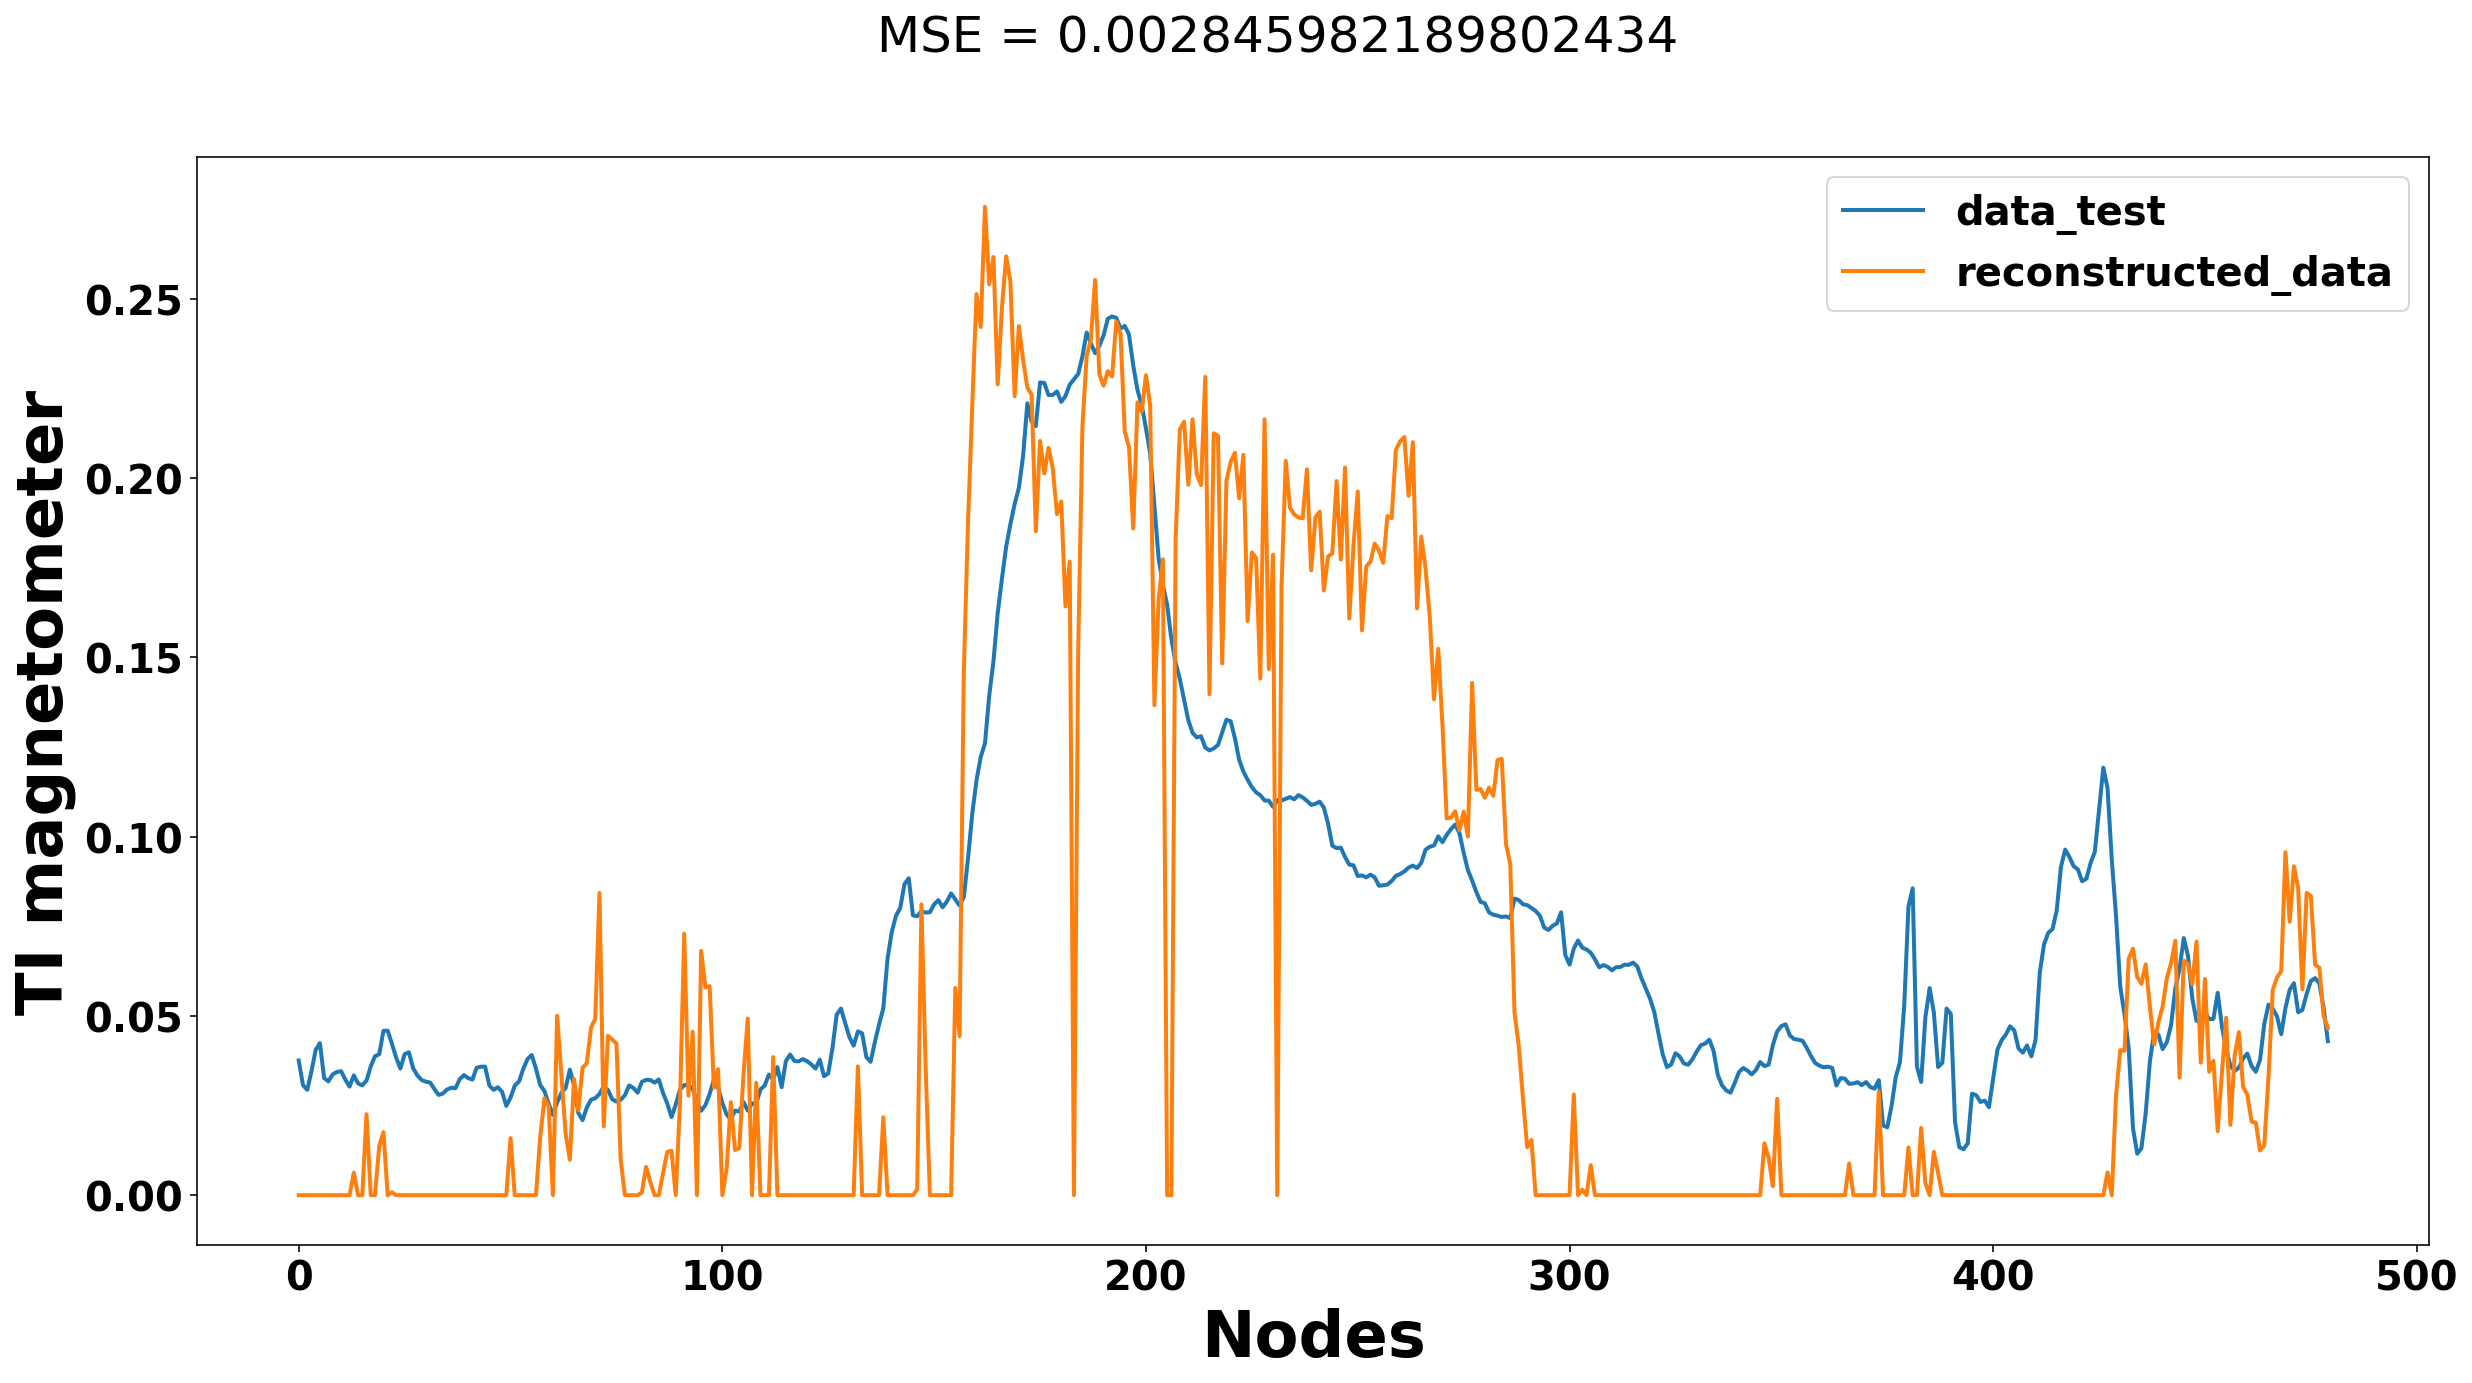

In [20]:
result_plot = pd.DataFrame({'data_test': data_test[0], 'reconstructed_data': reconstructed_data[0]})
data_plotting.plot_result(result_plot, 'Nodes', 'TI magnetometer', 20,
                          'model1_ae/20200716_085000-20200716_085500', '0p0028', 'same_location', mse)

## Test with false data

In [21]:
data_test_false = data_2["2020-07-16 09:02:00":"2020-07-16 09:04:00"][['mag_ti_norm']].values
data_test_false = data_test_false[0:window]
data_test_false = data_test_false.reshape(1,len(data_test_false))

print(data_test_false.shape)

(1, 480)


In [22]:
latent_vector_2 = encoder.predict(data_test_false)
reconstructed_data_false = decoder.predict(latent_vector_2)
mse_false = mean_squared_error(data_test_false, reconstructed_data_false)

print('MSE test data (data_2) : ', mse_false)

MSE test data (data_2) :  0.03089617143894737


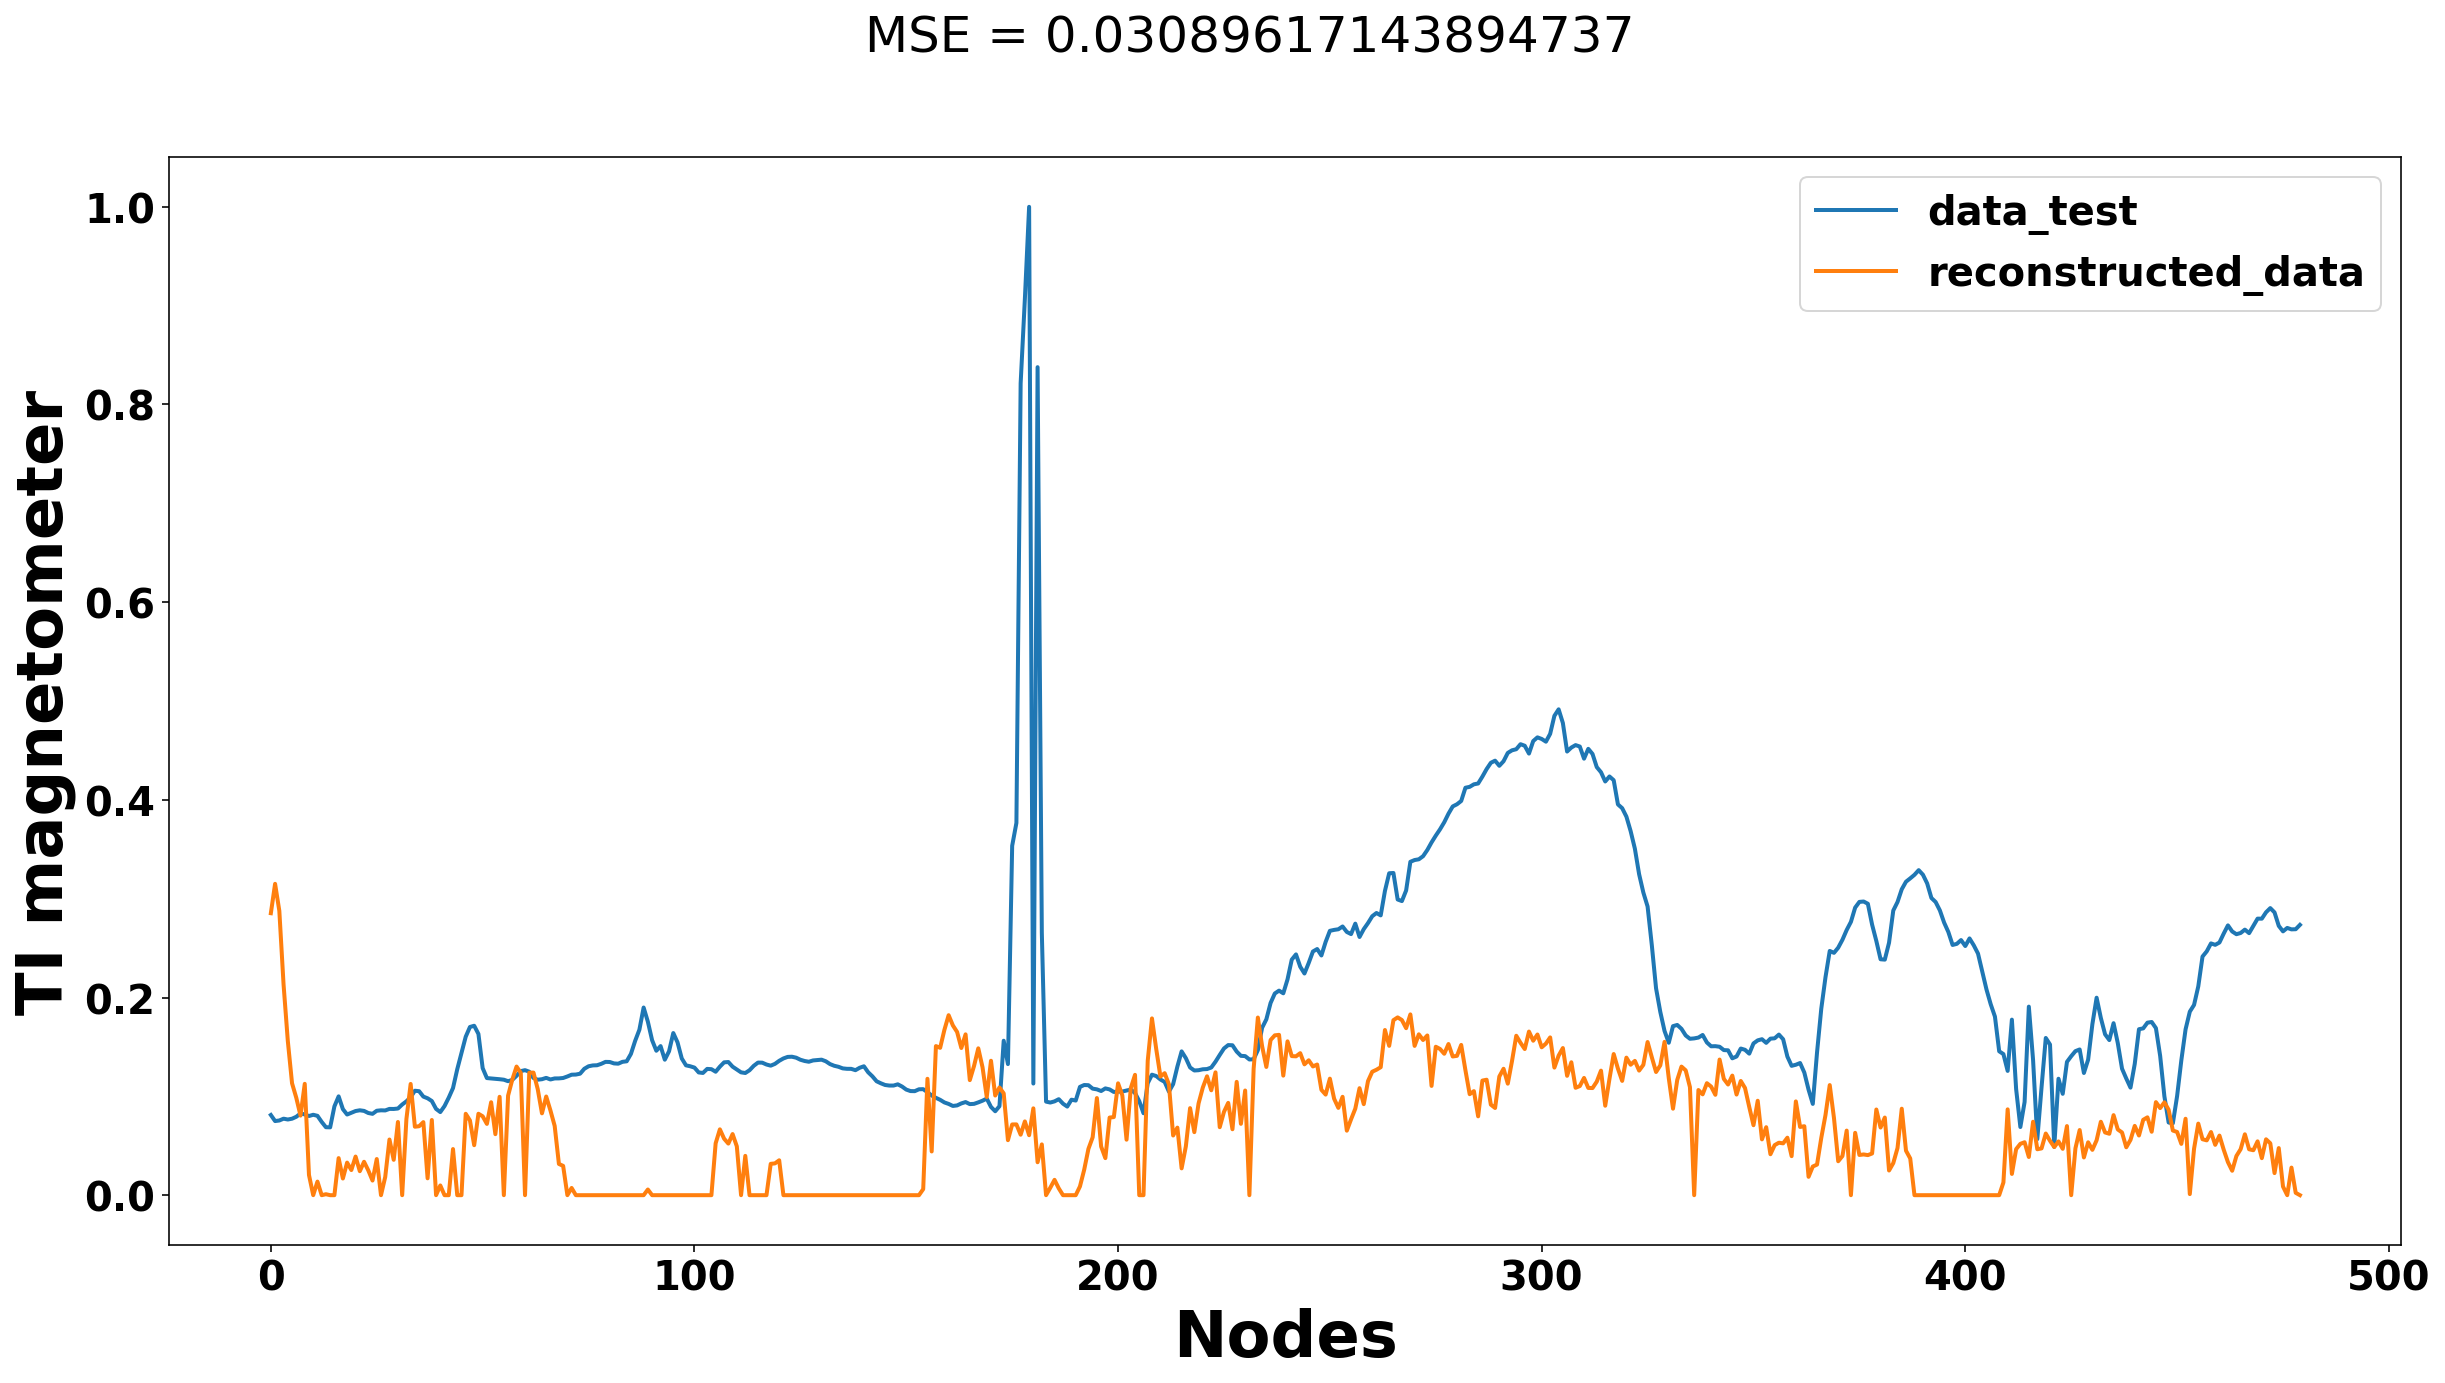

In [23]:
result_plot_false = pd.DataFrame({'data_test': data_test_false[0], 'reconstructed_data': reconstructed_data_false[0]})
data_plotting.plot_result(result_plot_false, 'Nodes', 'TI magnetometer', 20,
                          'model1_ae/20200716_085000-20200716_085500', '0p0028', 'different_location', mse_false)